In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [123]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import matplotlib.pyplot as plt
import seaborn as sns
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import *

In [124]:
df=pd.read_csv('file:///C:/Users/mdasi/Downloads/India_Menu.csv')
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [125]:
df.shape

(141, 13)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [127]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [128]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [129]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [130]:
filt = df['Per Serve Size'].str.contains('ml')
df.loc[filt,'Food Category']='Beverage'
filt = df['Per Serve Size'].str.contains('g')
df.loc[filt,'Food Category']='Food'

In [131]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food


In [132]:
def get_topcontent(col,cat):
    filt= df['Food Category']==cat
    filt=df.loc[filt]
    filt=filt[[col,'Menu Items','Menu Category']].sort_values(by=col,ascending=False)
    return filt.head()

In [133]:
get_topcontent('Energy (kCal)','Food')

,Energy (kCal),Menu Items,Menu Category
107,834.36,Chicken Cheese Lava Burger,Gourmet Menu
5,832.67,Veg Maharaja Mac,Regular Menu
18,720.30,Ghee Rice with Mc Spicy Fried Chicken 1 pc,Regular Menu
12,689.12,Chicken Maharaja Mac,Regular Menu
3,674.68,Spicy Paneer Wrap,Regular Menu


In [134]:
get_topcontent('Energy (kCal)','Beverage')

,Energy (kCal),Menu Items,Menu Category
82,481.11,Chocolate Oreo Frappe,McCafe Menu
91,398.19,American Mud Pie Shake,McCafe Menu
81,397.98,Mocha Frappe,McCafe Menu
64,383.29,Hot Chocolate (L),McCafe Menu
80,331.17,Cold Coffee Frappe,McCafe Menu


In [135]:
get_topcontent('Total fat (g)','Food')

,Total fat (g),Menu Items,Menu Category
107,45.18,Chicken Cheese Lava Burger,Gourmet Menu
2,39.45,McSpicy™ Paneer Burger,Regular Menu
110,39.21,McSpicy Premium Veg Burger,Gourmet Menu
3,39.10,Spicy Paneer Wrap,Regular Menu
5,37.94,Veg Maharaja Mac,Regular Menu


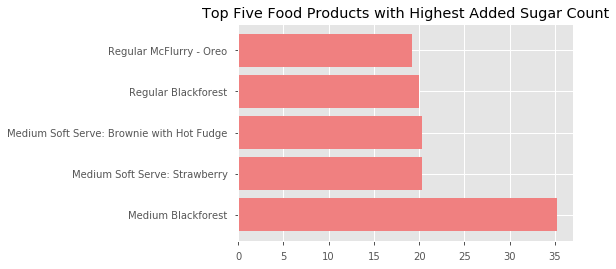

<Figure size 1080x576 with 0 Axes>

In [136]:
add_sug_food = get_topcontent('Added Sugars (g)','Food')
plt.style.use('ggplot')
plt.barh(add_sug_food['Menu Items'],add_sug_food['Added Sugars (g)'],color='#F08080')
plt.title('Top Five Food Products with Highest Added Sugar Count')
plt.figure(figsize=(15,8))
plt.show()

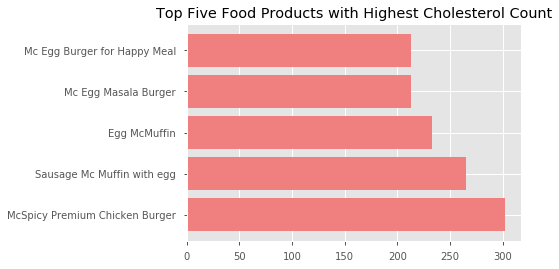

<Figure size 1080x576 with 0 Axes>

In [137]:
chol_food = get_topcontent('Cholesterols (mg)','Food')
plt.style.use('ggplot')
plt.barh(chol_food['Menu Items'],chol_food['Cholesterols (mg)'],color='#F08080')
plt.title('Top Five Food Products with Highest Cholesterol Count')
plt.figure(figsize=(15,8))
plt.show()

In [138]:
burger= df[df['Menu Items'].str.contains('Burger')]
burger.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,17.000000
mean,491.658333,18.551111,23.586667,9.011667,0.183889,71.76000,49.330000,8.235000,5.105000,1028.178235
std,154.297667,8.373225,10.980628,5.450490,0.045132,85.48284,12.054441,3.611513,2.096884,448.286644
min,282.980000,8.500000,11.310000,3.630000,0.110000,1.47000,31.320000,4.660000,2.640000,399.410000
25%,367.987500,12.330000,14.055000,4.965000,0.160000,22.69750,43.367500,5.655000,3.640000,706.130000
50%,449.435000,15.550000,21.150000,6.645000,0.180000,38.44500,47.070000,7.525000,4.490000,1051.240000
75%,631.595000,22.195000,32.987500,13.217500,0.207500,71.34250,55.487500,8.957500,6.057500,1170.890000
max,834.360000,39.470000,45.180000,20.460000,0.270000,302.61000,76.030000,16.750000,10.010000,1906.270000


In [139]:
cache= burger['Cholesterols (mg)'].max()
burger_max_chol= burger.loc[burger['Cholesterols (mg)']==cache,'Menu Items'].iloc[0]
print("Burger with the most cholesterol count is "+str(burger_max_chol))

Burger with the most cholesterol count is McSpicy Premium Chicken Burger


In [140]:
cache= burger['Cholesterols (mg)'].mean()
burger_mean_chol= burger.loc[burger['Cholesterols (mg)']>cache,'Menu Items']
list_burger = burger_mean_chol.to_list()
print('List of Burgers whose cholesterol count is above the mean: ')
print(*list_burger,sep="\n")

List of Burgers whose cholesterol count is above the mean: 
Mc Egg Masala Burger
Mc Egg Burger for Happy Meal
Chicken Cheese Lava Burger
Chunky Chipotle American Burger Chicken
McSpicy Premium Chicken Burger


C:\Users\mdasi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


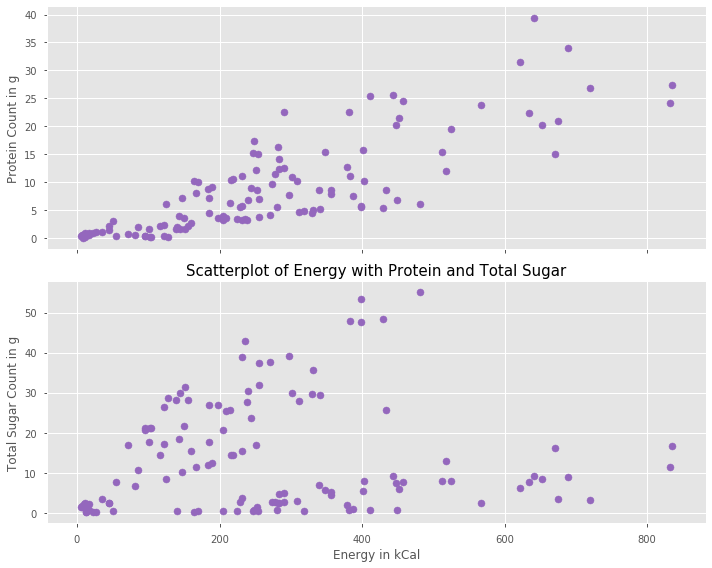

In [141]:
df2=df[['Protein (g)','Energy (kCal)']]
df2['Total Sugars (g)']=df['Total Sugars (g)']
df3 = df2.loc[(df2['Total Sugars (g)']>0) &(df2['Protein (g)']>0) &(df2['Energy (kCal)'])]
fig, ax = plt.subplots(nrows=2, ncols=1,sharex= True)
fig.set_figheight(8)
fig.set_figwidth(10)
ax[0].scatter(df3['Energy (kCal)'],df3['Protein (g)'],color='#9467bd')
ax[1].scatter(df3['Energy (kCal)'],df3['Total Sugars (g)'],color='#9467bd')
ax[1].set_xlabel('Energy in kCal')
ax[0].set_ylabel('Protein Count in g')
ax[1].set_ylabel('Total Sugar Count in g')
fig = plt.title('Scatterplot of Energy with Protein and Total Sugar',fontsize=15)
plt.tight_layout()
plt.show()

C:\Users\mdasi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


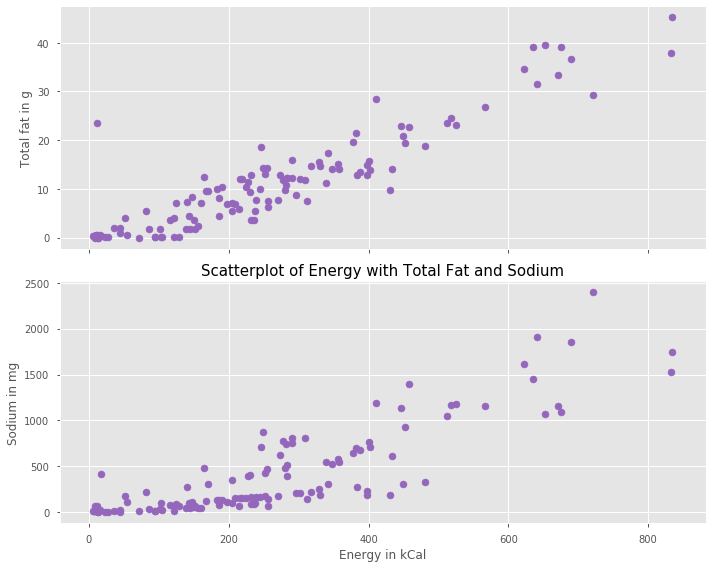

In [142]:
df2=df[['Total fat (g)','Energy (kCal)']]
df2['Sodium (mg)']=df['Sodium (mg)']
df3 = df2.loc[(df2['Sodium (mg)']>0) &(df2['Total fat (g)']>0) &(df2['Energy (kCal)'])]
fig, ax = plt.subplots(nrows=2, ncols=1,sharex= True)
fig.set_figheight(8)
fig.set_figwidth(10)
ax[0].scatter(df3['Energy (kCal)'],df3['Total fat (g)'],color='#9467bd')
ax[1].scatter(df3['Energy (kCal)'],df3['Sodium (mg)'],color='#9467bd')
ax[1].set_xlabel('Energy in kCal')
ax[0].set_ylabel('Total fat in g')
ax[1].set_ylabel('Sodium in mg')
fig = plt.title('Scatterplot of Energy with Total Fat and Sodium',fontsize=15)
plt.tight_layout()
plt.show()


In [143]:
df['Menu Category'].value_counts(normalize=True)

McCafe Menu        0.361702
Regular Menu       0.255319
Beverages Menu     0.120567
Breakfast Menu     0.106383
Gourmet Menu       0.078014
Condiments Menu    0.063830
Desserts Menu      0.014184
Name: Menu Category, dtype: float64

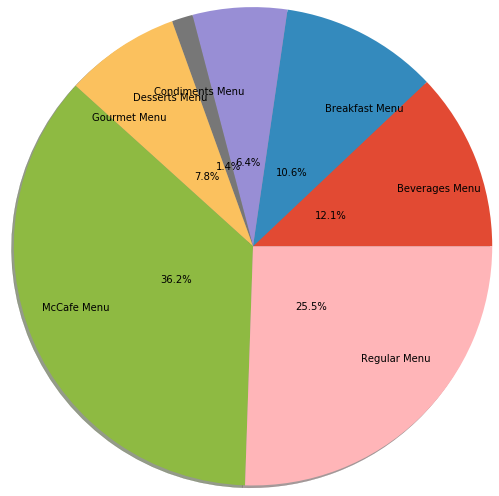

In [144]:
df1=df.groupby(['Menu Category']).size().reset_index(name='Count')
plt.style.use('seaborn-notebook')
fig=plt.pie(df1['Count'], labels=df1['Menu Category'],shadow= True, autopct="%1.1f%%",radius=2,labeldistance=0.65,pctdistance=0.35)
plt.show()

In [145]:
filt= df['Food Category']=='Food'
menu_food= df.loc[filt].groupby(['Menu Category']).size().reset_index(name='Count of Food')
menu_food = menu_food.drop(menu_food.index[[3]])#because there are no Gourmet Menu for beverages
menu_food = menu_food.drop(menu_food.index[[2]])#because there are no Dessert Menu for beverages
menu_food=menu_food.dropna()
menu_food.set_index('Menu Category',inplace=True)
menu_food.head()

,Count of Food
Menu Category,
Breakfast Menu,8
Condiments Menu,8
McCafe Menu,10
Regular Menu,34


In [146]:
filt = df['Food Category']=='Beverage'
menu_bev=df.loc[filt].groupby(['Menu Category']).size().reset_index(name='Count of Beverage')
menu_bev=menu_bev.drop(menu_bev.index[[0]])# because there are no Beverages Menu for food items
menu_bev=menu_bev.dropna()
menu_bev.set_index('Menu Category',inplace=True)
menu_bev

,Count of Beverage
Menu Category,
Breakfast Menu,7
Condiments Menu,1
McCafe Menu,41
Regular Menu,2


In [147]:
menu=pd.concat([menu_food,menu_bev],axis=1,sort= False)
menu

,Count of Food,Count of Beverage
Menu Category,,
Breakfast Menu,8,7
Condiments Menu,8,1
McCafe Menu,10,41
Regular Menu,34,2


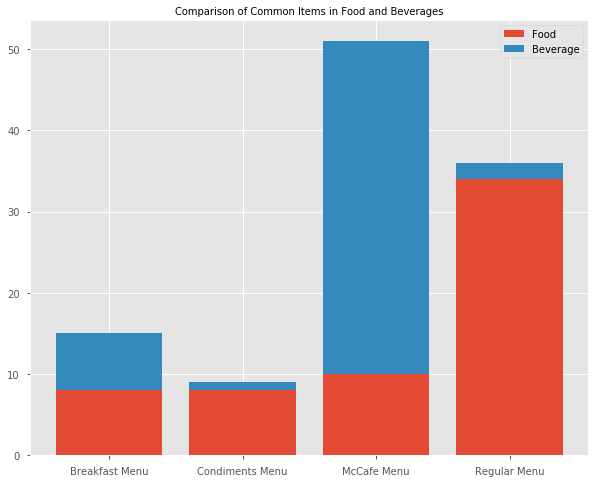

In [148]:
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.style.use('ggplot')
ax.bar(menu.index,menu['Count of Food'],label='Food')
ax.bar(menu.index,menu['Count of Beverage'],bottom=menu['Count of Food'],label='Beverage')
ax.legend()
ax.set_title('Comparison of Common Items in Food and Beverages',fontsize=10)
plt.show()


In [149]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food


In [150]:
df['Menu Items'].value_counts()

4 piece Chicken McNuggets        1
Flat White (R)                   1
Americano (S)                    1
Regular Wedges                   1
Spicy Egg McMuffin               1
                                ..
Mixed Fruit Beverage             1
Medium Soft Serve: Strawberry    1
Espresso                         1
Espresso Machiato                1
Sweet Lime Beverage              1
Name: Menu Items, Length: 141, dtype: int64

In [151]:
df1=df.copy()

In [152]:
df1.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food


In [153]:
le=LabelEncoder()
df1['Menu Items']=le.fit_transform(df1['Menu Items'])

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
df1

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,82,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,76,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,80,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,127,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,10,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,136,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,Food
137,Condiments Menu,71,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,Food
138,Condiments Menu,20,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,Food
139,Condiments Menu,134,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,Food


In [156]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food


In [157]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
Food Category              object
dtype: object

In [158]:
le=LabelEncoder()
df1['Food Category']=le.fit_transform(df1['Food Category'])

In [159]:
df1.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,82,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1
1,Regular Menu,76,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,1
2,Regular Menu,80,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1
3,Regular Menu,127,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1
4,Regular Menu,10,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1


In [160]:
df1=df1.drop(['Menu Category'],axis='columns')

In [161]:
print('Percentage of missing values in train data')
for i in np.arange(df1.shape[1]):
    n = df1.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(df1.columns.values)[i] + ': ' + str((n/df1.shape[0])*100) + '% nans')
print('Percentage of missing values in train data')
for i in np.arange(df1.shape[1]):
    n = df1.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(df1.columns.values)[i] + ': ' + str((n/df1.shape[0])*100) + ' nans')

Percentage of missing values in train data
Sodium (mg): 0.7092198581560284% nans
Percentage of missing values in train data
Sodium (mg): 0.7092198581560284 nans


In [162]:
for i  in df1.columns:
    print(f'unique values in column "{i}" is\n {df1[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Menu Items" is
 140    1
43     1
49     1
48     1
47     1
      ..
99     1
100    1
101    1
102    1
0      1
Name: Menu Items, Length: 141, dtype: int64
-------------------------------------------------
unique values in column "Per Serve Size" is
 544 ml      4
330 ml      4
394 ml      4
299 ml      4
279 ml      3
           ..
367 ml      1
250 g       1
311.5 ml    1
26.5 ml     1
296 g       1
Name: Per Serve Size, Length: 107, dtype: int64
-------------------------------------------------
unique values in column "Energy (kCal)" is
 290.42    2
12.87     2
17.13     1
230.95    1
689.12    1
         ..
151.56    1
214.21    1
400.80    1
137.60    1
125.25    1
Name: Energy (kCal), Length: 139, dtype: int64
-------------------------------------------------
unique values in column "Protein (g)" is
 0.00     16
1.52      3
0.52      3
0.24      2
0.56      2
         ..
7.70      1
19.54     1
0.07      1
6.15      1
8.50      1
Name: Protein (g), Len

In [163]:
object_col=[]
num_col=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [164]:
object_col

['Per Serve Size']

In [165]:
num_col

['Menu Items',
 'Energy (kCal)',
 'Protein (g)',
 'Total fat (g)',
 'Sat Fat (g)',
 'Trans fat (g)',
 'Cholesterols (mg)',
 'Total carbohydrate (g)',
 'Total Sugars (g)',
 'Added Sugars (g)',
 'Sodium (mg)',
 'Food Category']

In [166]:
df1.min()

Menu Items                   0
Per Serve Size            10 g
Energy (kCal)                0
Protein (g)                  0
Total fat (g)                0
Sat Fat (g)                  0
Trans fat (g)                0
Cholesterols (mg)            0
Total carbohydrate (g)       0
Total Sugars (g)             0
Added Sugars (g)             0
Sodium (mg)                  0
Food Category                0
dtype: object

In [167]:
df.max()

Menu Category             Regular Menu
Menu Items                Veg McMuffin
Per Serve Size                    96 g
Energy (kCal)                   834.36
Protein (g)                      39.47
Total fat (g)                    45.18
Sat Fat (g)                      20.46
Trans fat (g)                    75.26
Cholesterols (mg)               302.61
Total carbohydrate (g)           93.84
Total Sugars (g)                 64.22
Added Sugars (g)                 64.22
Sodium (mg)                    2399.49
Food Category                     Food
dtype: object

In [168]:
df.mean()

Energy (kCal)             244.635461
Protein (g)                 7.493546
Total fat (g)               9.991702
Sat Fat (g)                 4.997589
Trans fat (g)               0.687163
Cholesterols (mg)          26.350071
Total carbohydrate (g)     31.190284
Total Sugars (g)           15.464894
Added Sugars (g)           10.336950
Sodium (mg)               362.064143
dtype: float64

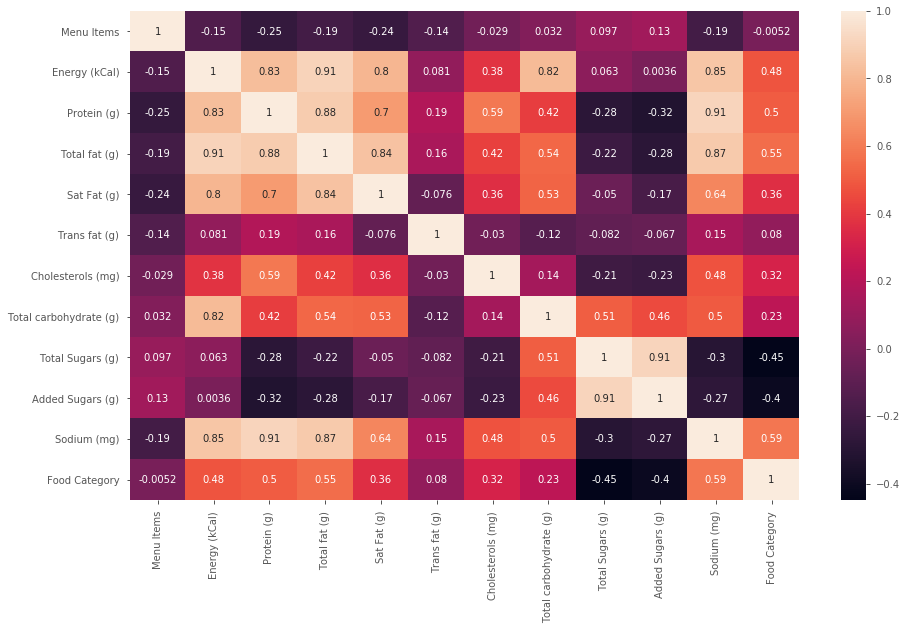

In [169]:
plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(),annot=True)

In [170]:
df1.columns

Index(['Menu Items', 'Per Serve Size', 'Energy (kCal)', 'Protein (g)',
       'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)',
       'Total carbohydrate (g)', 'Total Sugars (g)', 'Added Sugars (g)',
       'Sodium (mg)', 'Food Category'],
      dtype='object')

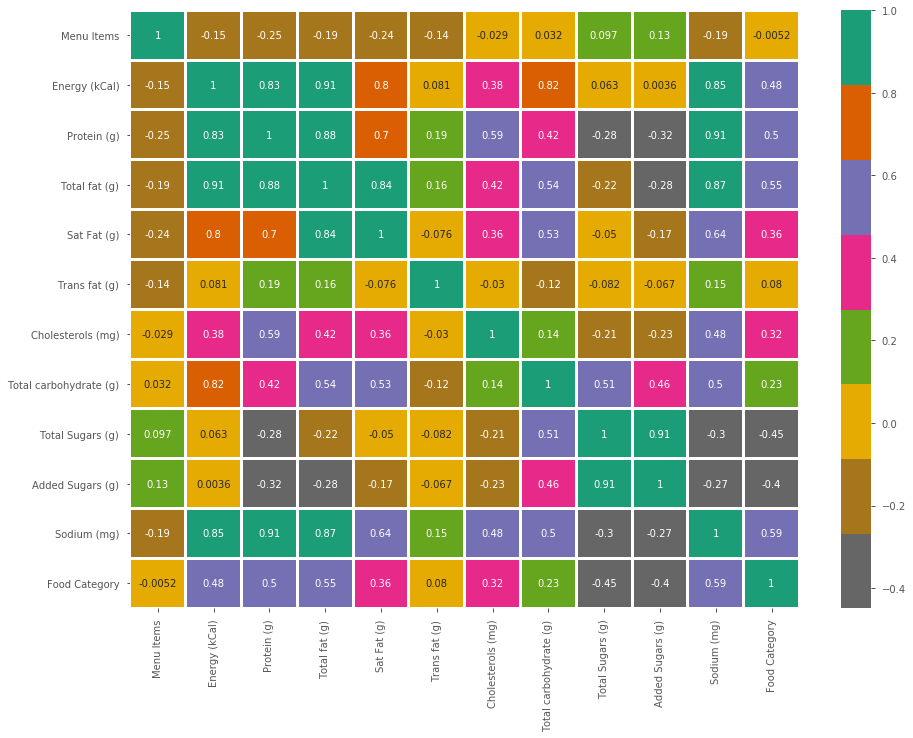

In [171]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df1.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [185]:
df1=df1.fillna(0)

In [186]:
df1=df1.rename({'Food Category':'Food_Category'},axis='columns')

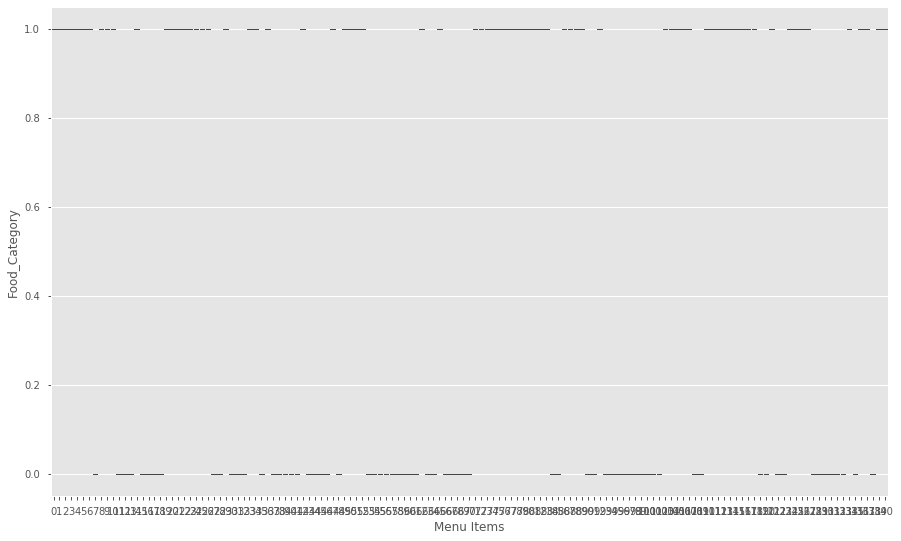

KeyError: 'Per Serve Size'

<Figure size 1080x648 with 0 Axes>

In [187]:
for i in ['Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)']:
    plt.figure(figsize=(15,9))
    sns.boxplot(y=df1.Food_Category,x=df1[i],data=df1,linewidth=1,)
    plt.show()

In [174]:
df1=df1.drop(['Per Serve Size'],axis='columns')

In [175]:
X=df1.drop(columns=['Food_Category'],axis=1)
y=df1['Food_Category']

In [176]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [177]:
xtrain.shape

(98, 11)

In [178]:
ytrain.shape

(98,)

In [179]:
xtest.shape

(43, 11)

In [180]:
ytrain.shape

(98,)

In [183]:
df1.head()

,Menu Items,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food_Category
0,82,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1
1,76,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,1
2,80,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1
3,127,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1
4,10,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1


In [188]:
df1.isnull().sum()

Menu Items                0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
Food_Category             0
dtype: int64

In [191]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food


In [189]:
df1.head()

,Menu Items,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food_Category
0,82,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,1
1,76,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,1
2,80,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,1
3,127,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,1
4,10,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,1
